In [3]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Carga desde un archivo .csv sin indice
data= pd.read_csv('rio_sin_nulos.csv') 

In [5]:
#Verificamos información del DataFrame
#objeto=string
#float=numero o decimales
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42572 entries, 0 to 42571
Data columns (total 63 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    42572 non-null  int64  
 1   source                                        42572 non-null  object 
 2   name                                          42572 non-null  object 
 3   host_name                                     42572 non-null  object 
 4   host_since                                    42572 non-null  object 
 5   host_location                                 42572 non-null  object 
 6   host_response_time                            42572 non-null  object 
 7   host_response_rate                            42572 non-null  float64
 8   host_acceptance_rate                          42572 non-null  float64
 9   host_is_superhost                             42572 non-null 

In [6]:
#Corroboramos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

Unnamed: 0                                      0
source                                          0
name                                            0
host_name                                       0
host_since                                      0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 63, dtype: int64

In [7]:
df = data.copy()

In [8]:
bool_cols = ['host_is_superhost','host_has_profile_pic',
             'host_identity_verified','has_availability','instant_bookable']
for c in bool_cols:
    print(c, df[c].astype(str).unique()[:20])


host_is_superhost ['f' 't']
host_has_profile_pic ['t' 'f']
host_identity_verified ['t' 'f']
has_availability ['t']
instant_bookable ['f' 't']


In [9]:
# a) Convertir booleanos 't'/'f' → 0 y 1
# Columnas booleanas
for c in bool_cols:
    if c in df.columns:
        df[c] = df[c].map({'t': 1, 'f': 0}).astype('int32')




In [10]:
for c in bool_cols:
    print(c, df[c].value_counts())


host_is_superhost host_is_superhost
0    28636
1    13936
Name: count, dtype: int64
host_has_profile_pic host_has_profile_pic
1    41018
0     1554
Name: count, dtype: int64
host_identity_verified host_identity_verified
1    35134
0     7438
Name: count, dtype: int64
has_availability has_availability
1    42572
Name: count, dtype: int64
instant_bookable instant_bookable
0    32772
1     9800
Name: count, dtype: int64


In [11]:
# c) Limpiar columnas de porcentaje → decimal en [0,1]
pct_cols = [c for c in df.columns if 'rate' in c.lower()]  # ej. host_acceptance_rate, host_response_rate

for c in pct_cols:
    if c in df.columns:
        s = df[c].astype(str).str.strip()

        # quita el símbolo % si existe (no rompe si no hay)
        s = s.str.replace('%', '', regex=False)

        # pásalo a número (los que no se puedan quedan NaN)
        num = pd.to_numeric(s, errors='coerce')

        # si el número está entre 1 y 100, interprétalo como porcentaje y divídelo entre 100
        df[c] = np.where(num.notna() & (num > 1.0) & (num <= 100.0), num / 100.0, num)


In [12]:
# --- Consolidar cambios en 'data' ---
data = df.copy()
print(data.dtypes)


Unnamed: 0                                        int64
source                                           object
name                                             object
host_name                                        object
host_since                                       object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 63, dtype: object


In [13]:
data

,Unnamed: 0,source,name,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,city scrape,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Matthias,2010-01-08,"Rio de Janeiro, Brazil",within an hour,1.00,0.95,0,...,4.83,4.91,4.78,4.67,0,1,1,0,0,1.86
1,1,city scrape,Beautiful Modern Decorated Studio in Copacabana,Viviane,2010-04-03,"Rio de Janeiro, Brazil",within an hour,1.00,1.00,1,...,4.83,4.93,4.85,4.65,0,1,1,0,0,1.71
2,2,city scrape,COPACABANA SEA BREEZE - RIO - 25 X Superhost,Patricia Miranda & Paulo,2010-06-27,"Rio de Janeiro, Brazil",within an hour,1.00,0.97,1,...,4.97,4.95,4.95,4.89,0,1,1,0,0,2.88
3,3,city scrape,Bright 6bed Penthouse Seconds from Beach,Goitaca,2010-01-16,"Rio de Janeiro, Brazil",within an hour,1.00,0.95,1,...,4.84,4.84,4.95,4.59,1,6,5,1,0,1.05
4,4,city scrape,Extra large 4BD 3BT on the AtlanticAve. Copaca...,Marcio,2010-09-03,"Rio de Janeiro, Brazil",within an hour,1.00,0.69,0,...,4.88,4.83,4.94,4.60,0,1,1,0,0,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42567,42567,city scrape,Aconchego Constante,Marco,2025-06-23,"Rio de Janeiro, Brazil",within an hour,1.00,1.00,0,...,0.00,0.00,0.00,0.00,1,1,1,0,0,0.00
42568,42568,city scrape,Quarto casal,Anna,2019-12-24,"Rio de Janeiro, Brazil",within an hour,1.00,1.00,0,...,0.00,0.00,0.00,0.00,0,1,0,1,0,0.00
42569,42569,city scrape,Cama em Dorm Misto (9) com AC,Mariana,2015-07-07,"Rio de Janeiro, Brazil",within an hour,0.93,1.00,1,...,0.00,0.00,0.00,0.00,1,8,0,4,4,0.00
42570,42570,city scrape,Quarto para casal,Anna,2020-12-09,Brazil,within an hour,1.00,1.00,0,...,0.00,0.00,0.00,0.00,0,1,0,1,0,0.00


In [14]:
# Lista de columnas de fechas
date_cols = ['host_since', 'calendar_last_scraped', 'first_review', 'last_review']

for col in date_cols:
    if col in data.columns:
        # Paso 1: convertir a datetime (formato día/mes/año)
        data[col] = pd.to_datetime(data[col], format="%d/%m/%Y", errors="coerce")

        # Paso 2: convertir a número (días desde la fecha mínima)
        min_date = data[col].min()
        data[col + "_num"] = (data[col] - min_date).dt.days

Dtypes de fechas:
host_since               datetime64[ns]
calendar_last_scraped    datetime64[ns]
first_review             datetime64[ns]
last_review              datetime64[ns]
dtype: object 

Head de fechas convertidas:


,host_since,calendar_last_scraped,first_review,last_review
0,NaT,NaT,NaT,NaT
1,NaT,NaT,NaT,NaT
2,NaT,NaT,NaT,NaT
3,NaT,NaT,NaT,NaT
4,NaT,NaT,NaT,NaT


Head de columnas numéricas derivadas:


,host_since_num,calendar_last_scraped_num,first_review_num,last_review_num
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN



Resumen:
- host_since: min=NaT  max=NaT  %NaN=100.00%  -> host_since_num: min=nan, max=nan
- calendar_last_scraped: min=NaT  max=NaT  %NaN=100.00%  -> calendar_last_scraped_num: min=nan, max=nan
- first_review: min=NaT  max=NaT  %NaN=100.00%  -> first_review_num: min=nan, max=nan
- last_review: min=NaT  max=NaT  %NaN=100.00%  -> last_review_num: min=nan, max=nan


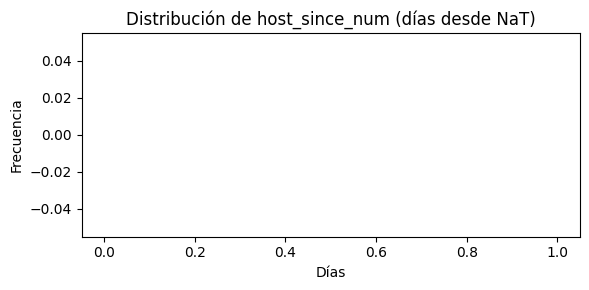

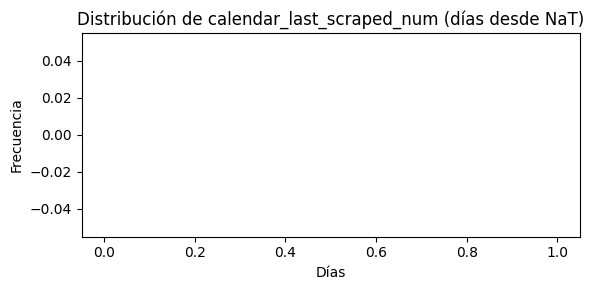

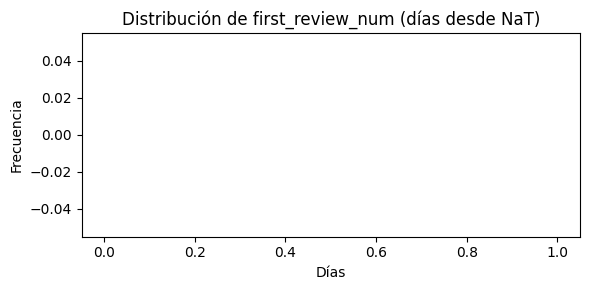

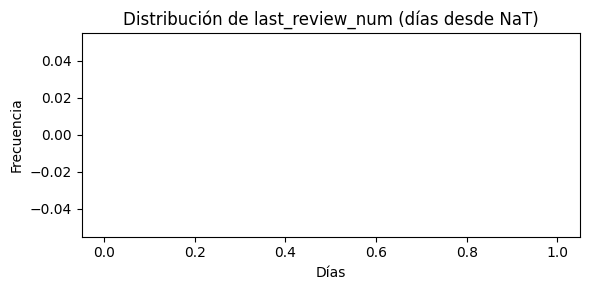

In [15]:

# 1) Confirmación rápida
date_cols = ['host_since', 'calendar_last_scraped', 'first_review', 'last_review']
date_cols = [c for c in date_cols if c in data.columns]  # solo las que existan
num_cols  = [c + "_num" for c in date_cols if (c + "_num") in data.columns]

print("Dtypes de fechas:")
print(data[date_cols].dtypes, "\n")
print("Head de fechas convertidas:")
display(data[date_cols].head())
print("Head de columnas numéricas derivadas:")
display(data[num_cols].head())

# 2) Resumen por columna
print("\nResumen:")
for c in date_cols:
    s = data[c]
    s_num = data[c + "_num"]
    n_na = s.isna().mean()
    print(f"- {c}: min={s.min()}  max={s.max()}  %NaN={n_na:.2%}  "
          f"-> {c+'_num'}: min={s_num.min()}, max={s_num.max()}")

# 3) Histogramas (una figura por columna)
for c in num_cols:
    s = data[c].dropna()
    base = str(data[c.replace("_num","")].min()).split(" ")[0]
    plt.figure(figsize=(6,3))
    plt.hist(s, bins=30)
    plt.title(f"Distribución de {c} (días desde {base})")
    plt.xlabel("Días")
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()


In [16]:
# DataFrame con solo variables cuantitativas (numéricas)
cuantitativas = data.select_dtypes(include=["int64", "float64", "int32", "float32", "int", "float"])
print("Columnas cuantitativas:\n", cuantitativas.columns.tolist())

Columnas cuantitativas:
 ['Unnamed: 0', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'availability_eoy', 'number_of_reviews_ly', 'estimated_occupancy_l365d', 'estimated_revenue_l365d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculat

In [17]:
# DataFrame con solo variables cualitativas (no numéricas)
cualitativas = data.select_dtypes(include=["object"])
print("Columnas cualitativas:\n", cualitativas.columns.tolist())

Columnas cualitativas:
 ['source', 'name', 'host_name', 'host_location', 'host_response_time', 'host_neighbourhood', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'amenities']


In [18]:
y = cuantitativas

Limite_Superior = y.mean(numeric_only=True) + 3*y.std(numeric_only=True)
Limite_Inferior = y.mean(numeric_only=True) - 3*y.std(numeric_only=True)

print("Limite superior permitido\n", Limite_Superior)
print("Limite inferior permitido\n", Limite_Inferior)

# Filtra manteniendo NaN donde sea outlier
data3 = y.where((y <= Limite_Superior) & (y >= Limite_Inferior))


Limite superior permitido
 Unnamed: 0                                       58154.366500
host_response_rate                                   1.579580
host_acceptance_rate                                 1.675048
host_is_superhost                                    1.735108
host_listings_count                                150.599057
host_total_listings_count                          343.098661
host_has_profile_pic                                 1.526117
host_identity_verified                               1.964469
latitude                                           -22.859044
longitude                                          -42.948093
accommodates                                        10.797407
bathrooms                                            4.256403
bedrooms                                            11.180574
beds                                                 8.453876
price                                            11478.863324
minimum_nights                             

In [19]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data3= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,Unnamed: 0,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_num,calendar_last_scraped_num,first_review_num,last_review_num
0,0,1.00,0.95,0,2.0,5.0,1.0,1,-22.965990,-43.179400,...,0,1.0,1.0,0.0,0.0,1.86,NaN,NaN,NaN,NaN
1,1,1.00,1.00,1,1.0,5.0,1.0,1,-22.976490,-43.191220,...,0,1.0,1.0,0.0,0.0,1.71,NaN,NaN,NaN,NaN
2,2,1.00,0.97,1,1.0,2.0,1.0,1,-22.981070,-43.191360,...,0,1.0,1.0,0.0,0.0,2.88,NaN,NaN,NaN,NaN
3,3,1.00,0.95,1,7.0,33.0,1.0,1,-22.985910,-43.203020,...,1,6.0,5.0,1.0,0.0,1.05,NaN,NaN,NaN,NaN
4,4,1.00,0.69,0,1.0,7.0,1.0,1,-22.965740,-43.175140,...,0,1.0,1.0,0.0,0.0,0.40,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42567,42567,1.00,1.00,0,1.0,1.0,NaN,1,-22.974055,-43.189129,...,1,1.0,1.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN
42568,42568,1.00,1.00,0,1.0,1.0,1.0,1,-22.979640,-43.423380,...,0,1.0,0.0,1.0,0.0,0.00,NaN,NaN,NaN,NaN
42569,42569,0.93,1.00,1,8.0,12.0,1.0,1,-22.983102,-43.208741,...,1,8.0,0.0,4.0,NaN,0.00,NaN,NaN,NaN,NaN
42570,42570,1.00,1.00,0,1.0,1.0,1.0,1,-22.984526,-43.431740,...,0,1.0,0.0,1.0,0.0,0.00,NaN,NaN,NaN,NaN


In [20]:
#Corroboramos valores nulos del dataframe4
valores_nulos=data3.isnull().sum()
valores_nulos

Unnamed: 0                                          0
host_response_rate                               1936
host_acceptance_rate                                0
host_is_superhost                                   0
host_listings_count                               733
host_total_listings_count                         711
host_has_profile_pic                             1554
host_identity_verified                              0
latitude                                          455
longitude                                         538
accommodates                                      807
bathrooms                                         780
bedrooms                                          752
beds                                              425
price                                             173
minimum_nights                                    231
maximum_nights                                      0
minimum_minimum_nights                            210
maximum_minimum_nights      

In [21]:
# Reemplazamos valores atípicos (nulos) del dataframe con "mean"
# Realizamos una copia del dataframe
data_clean = data3.copy()

# Solo calculamos la media en columnas float, y usamos eso en fillna
means = data3.select_dtypes(include=['float64','float32']).mean().round(1)

data_clean = data_clean.fillna(means)

data_clean


,Unnamed: 0,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_num,calendar_last_scraped_num,first_review_num,last_review_num
0,0,1.00,0.95,0,2.0,5.0,1.0,1,-22.965990,-43.179400,...,0,1.0,1.0,0.0,0.0,1.86,NaN,NaN,NaN,NaN
1,1,1.00,1.00,1,1.0,5.0,1.0,1,-22.976490,-43.191220,...,0,1.0,1.0,0.0,0.0,1.71,NaN,NaN,NaN,NaN
2,2,1.00,0.97,1,1.0,2.0,1.0,1,-22.981070,-43.191360,...,0,1.0,1.0,0.0,0.0,2.88,NaN,NaN,NaN,NaN
3,3,1.00,0.95,1,7.0,33.0,1.0,1,-22.985910,-43.203020,...,1,6.0,5.0,1.0,0.0,1.05,NaN,NaN,NaN,NaN
4,4,1.00,0.69,0,1.0,7.0,1.0,1,-22.965740,-43.175140,...,0,1.0,1.0,0.0,0.0,0.40,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42567,42567,1.00,1.00,0,1.0,1.0,1.0,1,-22.974055,-43.189129,...,1,1.0,1.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN
42568,42568,1.00,1.00,0,1.0,1.0,1.0,1,-22.979640,-43.423380,...,0,1.0,0.0,1.0,0.0,0.00,NaN,NaN,NaN,NaN
42569,42569,0.93,1.00,1,8.0,12.0,1.0,1,-22.983102,-43.208741,...,1,8.0,0.0,4.0,0.0,0.00,NaN,NaN,NaN,NaN
42570,42570,1.00,1.00,0,1.0,1.0,1.0,1,-22.984526,-43.431740,...,0,1.0,0.0,1.0,0.0,0.00,NaN,NaN,NaN,NaN


In [22]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

Unnamed: 0                                          0
host_response_rate                                  0
host_acceptance_rate                                0
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
latitude                                            0
longitude                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                            0
beds                                                0
price                                               0
minimum_nights                                      0
maximum_nights                                      0
minimum_minimum_nights                              0
maximum_minimum_nights      

In [23]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=cuantitativas

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido Unnamed: 0                                      63856.500000
host_response_rate                                  1.000000
host_acceptance_rate                                1.495000
host_is_superhost                                   2.500000
host_listings_count                                16.000000
host_total_listings_count                          26.000000
host_has_profile_pic                                1.000000
host_identity_verified                              1.000000
latitude                                          -22.901544
longitude                                         -43.015132
accommodates                                        9.500000
bathrooms                                           3.500000
bedrooms                                            3.500000
beds                                                6.000000
price                                            1408.000000
minimum_nights                                      6.00000

In [24]:
#Obtenemos datos limpios del Dataframe
data3_iqr= cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,Unnamed: 0,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_num,calendar_last_scraped_num,first_review_num,last_review_num
0,0,1.0,0.95,0,2.0,5.0,1.0,1.0,-22.965990,-43.179400,...,0.0,1.0,1.0,0.0,0.0,1.86,NaN,NaN,NaN,NaN
1,1,1.0,1.00,1,1.0,5.0,1.0,1.0,-22.976490,-43.191220,...,0.0,1.0,1.0,0.0,0.0,1.71,NaN,NaN,NaN,NaN
2,2,1.0,0.97,1,1.0,2.0,1.0,1.0,-22.981070,-43.191360,...,0.0,1.0,1.0,0.0,0.0,2.88,NaN,NaN,NaN,NaN
3,3,1.0,0.95,1,7.0,NaN,1.0,1.0,-22.985910,-43.203020,...,NaN,6.0,5.0,1.0,0.0,1.05,NaN,NaN,NaN,NaN
4,4,1.0,0.69,0,1.0,7.0,1.0,1.0,-22.965740,-43.175140,...,0.0,1.0,1.0,0.0,0.0,0.40,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42567,42567,1.0,1.00,0,1.0,1.0,NaN,1.0,-22.974055,-43.189129,...,NaN,1.0,1.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN
42568,42568,1.0,1.00,0,1.0,1.0,1.0,1.0,-22.979640,-43.423380,...,0.0,1.0,0.0,1.0,0.0,0.00,NaN,NaN,NaN,NaN
42569,42569,NaN,1.00,1,8.0,12.0,1.0,1.0,-22.983102,-43.208741,...,NaN,8.0,0.0,NaN,NaN,0.00,NaN,NaN,NaN,NaN
42570,42570,1.0,1.00,0,1.0,1.0,1.0,1.0,-22.984526,-43.431740,...,0.0,1.0,0.0,1.0,0.0,0.00,NaN,NaN,NaN,NaN


In [25]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

Unnamed: 0                                          0
host_response_rate                              10347
host_acceptance_rate                             3392
host_is_superhost                                   0
host_listings_count                              6558
host_total_listings_count                        5687
host_has_profile_pic                             1554
host_identity_verified                           7438
latitude                                         1860
longitude                                        2382
accommodates                                     1376
bathrooms                                        1161
bedrooms                                         2108
beds                                              970
price                                            2777
minimum_nights                                   2352
maximum_nights                                   7127
minimum_minimum_nights                           2156
maximum_minimum_nights      

In [26]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data4_iqr=data3_iqr.copy()
data4_iqr=data4_iqr.fillna(round(data3_iqr.median(),1))
data4_iqr

,Unnamed: 0,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_num,calendar_last_scraped_num,first_review_num,last_review_num
0,0,1.0,0.95,0,2.0,5.0,1.0,1.0,-22.965990,-43.179400,...,0.0,1.0,1.0,0.0,0.0,1.86,NaN,NaN,NaN,NaN
1,1,1.0,1.00,1,1.0,5.0,1.0,1.0,-22.976490,-43.191220,...,0.0,1.0,1.0,0.0,0.0,1.71,NaN,NaN,NaN,NaN
2,2,1.0,0.97,1,1.0,2.0,1.0,1.0,-22.981070,-43.191360,...,0.0,1.0,1.0,0.0,0.0,2.88,NaN,NaN,NaN,NaN
3,3,1.0,0.95,1,7.0,2.0,1.0,1.0,-22.985910,-43.203020,...,0.0,6.0,5.0,1.0,0.0,1.05,NaN,NaN,NaN,NaN
4,4,1.0,0.69,0,1.0,7.0,1.0,1.0,-22.965740,-43.175140,...,0.0,1.0,1.0,0.0,0.0,0.40,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42567,42567,1.0,1.00,0,1.0,1.0,1.0,1.0,-22.974055,-43.189129,...,0.0,1.0,1.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN
42568,42568,1.0,1.00,0,1.0,1.0,1.0,1.0,-22.979640,-43.423380,...,0.0,1.0,0.0,1.0,0.0,0.00,NaN,NaN,NaN,NaN
42569,42569,1.0,1.00,1,8.0,12.0,1.0,1.0,-22.983102,-43.208741,...,0.0,8.0,0.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN
42570,42570,1.0,1.00,0,1.0,1.0,1.0,1.0,-22.984526,-43.431740,...,0.0,1.0,0.0,1.0,0.0,0.00,NaN,NaN,NaN,NaN


In [27]:
# Unimos el dataframe cuantitativo limpio con el dataframe cualitativo
Datos_limpios = pd.concat([cualitativas, data4_iqr], axis=1)
Datos_limpios

,source,name,host_name,host_location,host_response_time,host_neighbourhood,neighbourhood,neighbourhood_cleansed,property_type,room_type,...,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_num,calendar_last_scraped_num,first_review_num,last_review_num
0,city scrape,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Matthias,"Rio de Janeiro, Brazil",within an hour,Copacabana,"Rio de Janeiro, Brazil",Copacabana,Entire condo,Entire home/apt,...,0.0,1.0,1.0,0.0,0.0,1.86,NaN,NaN,NaN,NaN
1,city scrape,Beautiful Modern Decorated Studio in Copacabana,Viviane,"Rio de Janeiro, Brazil",within an hour,Copacabana,"Rio de Janeiro, Brazil",Copacabana,Entire rental unit,Entire home/apt,...,0.0,1.0,1.0,0.0,0.0,1.71,NaN,NaN,NaN,NaN
2,city scrape,COPACABANA SEA BREEZE - RIO - 25 X Superhost,Patricia Miranda & Paulo,"Rio de Janeiro, Brazil",within an hour,Copacabana,"Rio de Janeiro, Brazil",Copacabana,Entire loft,Entire home/apt,...,0.0,1.0,1.0,0.0,0.0,2.88,NaN,NaN,NaN,NaN
3,city scrape,Bright 6bed Penthouse Seconds from Beach,Goitaca,"Rio de Janeiro, Brazil",within an hour,Ipanema,"Ipanema, Rio de Janeiro, Brazil",Ipanema,Entire rental unit,Entire home/apt,...,0.0,6.0,5.0,1.0,0.0,1.05,NaN,NaN,NaN,NaN
4,city scrape,Extra large 4BD 3BT on the AtlanticAve. Copaca...,Marcio,"Rio de Janeiro, Brazil",within an hour,Copacabana,"Rio, Rio de Janeiro, Brazil",Copacabana,Entire rental unit,Entire home/apt,...,0.0,1.0,1.0,0.0,0.0,0.40,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42567,city scrape,Aconchego Constante,Marco,"Rio de Janeiro, Brazil",within an hour,Copacabana,"Rio de Janeiro, Brazil",Copacabana,Entire rental unit,Entire home/apt,...,0.0,1.0,1.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN
42568,city scrape,Quarto casal,Anna,"Rio de Janeiro, Brazil",within an hour,Jacarepaguá,"Rio de Janeiro, Brazil",Camorim,Private room in rental unit,Private room,...,0.0,1.0,0.0,1.0,0.0,0.00,NaN,NaN,NaN,NaN
42569,city scrape,Cama em Dorm Misto (9) com AC,Mariana,"Rio de Janeiro, Brazil",within an hour,Ipanema,"Rio de Janeiro, Brazil",Ipanema,Shared room in hostel,Shared room,...,0.0,8.0,0.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN
42570,city scrape,Quarto para casal,Anna,Brazil,within an hour,Camorim,"Rio de Janeiro, Brazil",Camorim,Private room in rental unit,Private room,...,0.0,1.0,0.0,1.0,0.0,0.00,NaN,NaN,NaN,NaN


In [28]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

source                           0
name                             0
host_name                        0
host_location                    0
host_response_time               0
                             ...  
reviews_per_month                0
host_since_num               42572
calendar_last_scraped_num    42572
first_review_num             42572
last_review_num              42572
Length: 63, dtype: int64

In [29]:
#Corroboramos valores nulos en todo el dataframe
valores_nulos=Datos_limpios.isnull().sum().sum()
valores_nulos

np.int64(170288)

In [30]:
#Eliminar columnas innecesarias
#axis = 1 para columnas
#axis = 0 para filas
data4=Datos_limpios.drop(['Unnamed: 0'], axis=1)
data4

,source,name,host_name,host_location,host_response_time,host_neighbourhood,neighbourhood,neighbourhood_cleansed,property_type,room_type,...,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_num,calendar_last_scraped_num,first_review_num,last_review_num
0,city scrape,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Matthias,"Rio de Janeiro, Brazil",within an hour,Copacabana,"Rio de Janeiro, Brazil",Copacabana,Entire condo,Entire home/apt,...,0.0,1.0,1.0,0.0,0.0,1.86,NaN,NaN,NaN,NaN
1,city scrape,Beautiful Modern Decorated Studio in Copacabana,Viviane,"Rio de Janeiro, Brazil",within an hour,Copacabana,"Rio de Janeiro, Brazil",Copacabana,Entire rental unit,Entire home/apt,...,0.0,1.0,1.0,0.0,0.0,1.71,NaN,NaN,NaN,NaN
2,city scrape,COPACABANA SEA BREEZE - RIO - 25 X Superhost,Patricia Miranda & Paulo,"Rio de Janeiro, Brazil",within an hour,Copacabana,"Rio de Janeiro, Brazil",Copacabana,Entire loft,Entire home/apt,...,0.0,1.0,1.0,0.0,0.0,2.88,NaN,NaN,NaN,NaN
3,city scrape,Bright 6bed Penthouse Seconds from Beach,Goitaca,"Rio de Janeiro, Brazil",within an hour,Ipanema,"Ipanema, Rio de Janeiro, Brazil",Ipanema,Entire rental unit,Entire home/apt,...,0.0,6.0,5.0,1.0,0.0,1.05,NaN,NaN,NaN,NaN
4,city scrape,Extra large 4BD 3BT on the AtlanticAve. Copaca...,Marcio,"Rio de Janeiro, Brazil",within an hour,Copacabana,"Rio, Rio de Janeiro, Brazil",Copacabana,Entire rental unit,Entire home/apt,...,0.0,1.0,1.0,0.0,0.0,0.40,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42567,city scrape,Aconchego Constante,Marco,"Rio de Janeiro, Brazil",within an hour,Copacabana,"Rio de Janeiro, Brazil",Copacabana,Entire rental unit,Entire home/apt,...,0.0,1.0,1.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN
42568,city scrape,Quarto casal,Anna,"Rio de Janeiro, Brazil",within an hour,Jacarepaguá,"Rio de Janeiro, Brazil",Camorim,Private room in rental unit,Private room,...,0.0,1.0,0.0,1.0,0.0,0.00,NaN,NaN,NaN,NaN
42569,city scrape,Cama em Dorm Misto (9) com AC,Mariana,"Rio de Janeiro, Brazil",within an hour,Ipanema,"Rio de Janeiro, Brazil",Ipanema,Shared room in hostel,Shared room,...,0.0,8.0,0.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN
42570,city scrape,Quarto para casal,Anna,Brazil,within an hour,Camorim,"Rio de Janeiro, Brazil",Camorim,Private room in rental unit,Private room,...,0.0,1.0,0.0,1.0,0.0,0.00,NaN,NaN,NaN,NaN


In [32]:
#Convertir DataFrame a CSV
data4.to_csv("Datos_Rio_Limpio.csv")